# Sample Analysis
## Socrata Open Data API (SODA) Tutorial Using NYC Open Data
Author: Mark Bauer

Table of Contents
=================

   1. Introduction
   2. Importing Libraries
   3. Analyzing Datasets on NYC Open Data    
       * 3.1 Analyzing NYC Datasets with the Most Downloads
       * 3.2 Analyzing NYC Datasets with the Most Page Views
   4. Questions about NYC 311 Complaints
       * 4.1 Most NYC 311 Complaints by Complaint Type
       * 4.2 Most NYC 311 Complaints by Day
   5. Questions about NYC 311 Street Flooding Complaints
       * 5.1 Searching the dataset for the word "flood" in the complaint_type field
       * 5.2 Searching the dataset for the word "flood" in the descriptor field
       * 5.3 Displaying the highest number of street flooding complaints by day
       * 5.4 Selecting the rows and columns where the descriptor field = 'Street Flooding'      

# 1. Introduction  
This notebook demonstrates a sample data analysis project using the Socrata API to explore data from NYC Open Data. We will apply our knowledge of the Socrata API, SoQL (Socrata Query Language), and the sodapy Python client to analyze and extract insights in New York City.

The analysis begins by examining dataset metadata, specifically focusing on datasets with the highest number of downloads and page views. The following sections analyze the NYC 311 Complaints dataset, where we will explore: 1) summary statistics by various categories and 2) 311 Street Flooding Complaints.

I hope this sample analysis inspires you to explore and uncover your own insights from the rich datasets available in New York City.

### Attention about Sodapy
When querying all records, be sure to set the `limit` parameter to a value large enough to exceed the total number of records in your dataset. If the `limit` value is set to exactly the same number as the records returned, you likely haven’t retrieved all the data. To avoid this, choose a `limit` that is larger than the dataset’s total size.

# 2. Importing Libraries

In [1]:
# importing libraries
import pandas as pd
import numpy as np
from sodapy import Socrata
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import urllib.parse

sns.set_theme()
plt.rcParams['savefig.facecolor'] = 'white'

In [2]:
# documention for installing watermark: https://github.com/rasbt/watermark, performed for reproducibility
%reload_ext watermark
%watermark -t -d -v -p pandas,sodapy

Python implementation: CPython
Python version       : 3.11.0
IPython version      : 8.6.0

pandas: 1.5.1
sodapy: 2.2.0



# 3. Analyzing Datasets on NYC Open Data
Note: `WARNING:root:Requests made without an app_token will be subject to strict throttling limits.`

## 3.1 Analyzing NYC Datasets with the Most Downloads
We'll use Socrata's [Discovery API](https://dev.socrata.com/docs/other/discovery#?route=overview) to inspect metadata of datasets on NYC Open Data.

In [3]:
# source domain for NYC Open Data on Socrata
socrata_domain = 'data.cityofnewyork.us'

# pass domain to the sodapy's Socrata class
client = Socrata(
    socrata_domain,
    app_token=None,
    timeout=1000
)

# use sodapy's datasets method to fetch data
datasets = client.datasets()

# reading in a list of dictionaries returned from the datasets method
# into a pandas DataFrame
df = pd.DataFrame(datasets)

# sanity check
print(df.shape)
df.head()

(3237, 8)


,resource,classification,metadata,permalink,link,owner,creator,preview_image_url
0,"{'name': 'For Hire Vehicles (FHV) - Active', '...","{'categories': [], 'tags': [], 'domain_categor...",{'domain': 'data.cityofnewyork.us'},https://data.cityofnewyork.us/d/8wbx-tsch,https://data.cityofnewyork.us/Transportation/F...,"{'id': '5fuc-pqz2', 'user_type': 'interactive'...","{'id': '5fuc-pqz2', 'user_type': 'interactive'...",NaN
1,"{'name': 'Civil Service List (Active)', 'id': ...","{'categories': [], 'tags': [], 'domain_categor...",{'domain': 'data.cityofnewyork.us'},https://data.cityofnewyork.us/d/vx8i-nprf,https://data.cityofnewyork.us/City-Government/...,"{'id': '5fuc-pqz2', 'user_type': 'interactive'...","{'id': '5fuc-pqz2', 'user_type': 'interactive'...",NaN
2,"{'name': 'DOB Job Application Filings', 'id': ...","{'categories': [], 'tags': [], 'domain_categor...",{'domain': 'data.cityofnewyork.us'},https://data.cityofnewyork.us/d/ic3t-wcy2,https://data.cityofnewyork.us/Housing-Developm...,"{'id': '5fuc-pqz2', 'user_type': 'interactive'...","{'id': '5fuc-pqz2', 'user_type': 'interactive'...",NaN
3,"{'name': 'TLC New Driver Application Status', ...","{'categories': [], 'tags': [], 'domain_categor...",{'domain': 'data.cityofnewyork.us'},https://data.cityofnewyork.us/d/dpec-ucu7,https://data.cityofnewyork.us/Transportation/T...,"{'id': '5fuc-pqz2', 'user_type': 'interactive'...","{'id': '5fuc-pqz2', 'user_type': 'interactive'...",NaN
4,{'name': 'For Hire Vehicles (FHV) - Active Dri...,"{'categories': [], 'tags': [], 'domain_categor...",{'domain': 'data.cityofnewyork.us'},https://data.cityofnewyork.us/d/xjfq-wh2d,https://data.cityofnewyork.us/Transportation/F...,"{'id': '5fuc-pqz2', 'user_type': 'interactive'...","{'id': '5fuc-pqz2', 'user_type': 'interactive'...",NaN


In [4]:
# the resource column contains our data
# we'll need to retrieve and read only this column
# and construct a df from dictionaries
df = pd.DataFrame.from_records(df.resource)

# sanity check
print(df.shape)
df.head()

(3237, 27)


,name,id,resource_name,parent_fxf,description,attribution,attribution_link,contact_email,type,updatedAt,...,columns_description,columns_format,download_count,provenance,lens_view_type,lens_display_type,locked,blob_mime_type,hide_from_data_json,publication_date
0,For Hire Vehicles (FHV) - Active,8wbx-tsch,None,[],"<b>PLEASE NOTE:</b> This dataset, which includ...",Taxi and Limousine Commission (TLC),None,None,dataset,2024-12-02T19:55:58.000Z,...,"[Permit active or not\n, Base Type, Reason Cod...","[{'displayStyle': 'plain', 'align': 'left'}, {...",531615,official,tabular,table,False,None,False,2021-04-05T13:20:47.000Z
1,Civil Service List (Active),vx8i-nprf,None,[],A Civil Service List consists of all candidate...,Department of Citywide Administrative Services...,None,None,dataset,2024-12-02T14:16:52.000Z,...,[The date on which a list will be extended bey...,"[{'view': 'date', 'align': 'left'}, {'view': '...",68077,official,tabular,table,False,None,False,2024-01-12T16:15:05.000Z
2,DOB Job Application Filings,ic3t-wcy2,None,[],This dataset contains all job applications sub...,Department of Buildings (DOB),None,None,dataset,2024-12-02T21:02:15.000Z,...,"[Sprinkler Work Type? (X=Yes, Blank=No), Zoni...","[{'align': 'right'}, {'align': 'right'}, {'ali...",59315,official,tabular,table,False,None,False,2020-06-22T18:23:35.000Z
3,TLC New Driver Application Status,dpec-ucu7,None,[],THIS DATASET IS UPDATED SEVERAL TIMES PER DAY....,Taxi and Limousine Commission (TLC),None,None,dataset,2024-12-02T23:07:20.000Z,...,[This is the classification of license you hav...,"[{'displayStyle': 'plain', 'align': 'left'}, {...",39623,official,tabular,table,False,None,False,2019-12-17T18:44:57.000Z
4,For Hire Vehicles (FHV) - Active Drivers,xjfq-wh2d,None,[],"<b>PLEASE NOTE:</b> This dataset, which includ...",Taxi and Limousine Commission (TLC),None,None,dataset,2024-12-02T19:57:58.000Z,...,"[WAV if Wheelchair Accessible Trained\n, FHV L...","[{'displayStyle': 'plain', 'align': 'left'}, {...",418592,official,tabular,table,False,None,False,2024-01-11T19:58:17.000Z


In [5]:
# preview columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3237 entries, 0 to 3236
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   name                 3237 non-null   object
 1   id                   3237 non-null   object
 2   resource_name        0 non-null      object
 3   parent_fxf           3237 non-null   object
 4   description          3237 non-null   object
 5   attribution          3170 non-null   object
 6   attribution_link     449 non-null    object
 7   contact_email        0 non-null      object
 8   type                 3237 non-null   object
 9   updatedAt            3237 non-null   object
 10  createdAt            3237 non-null   object
 11  metadata_updated_at  3237 non-null   object
 12  data_updated_at      3060 non-null   object
 13  page_views           3237 non-null   object
 14  columns_name         3237 non-null   object
 15  columns_field_name   3237 non-null   object
 16  column

In [6]:
# group count of datasets by agency, top 20
data = (
    df
    .groupby(by='attribution')['name']
    .count()
    .sort_values(ascending=False)
    .reset_index()
    .rename(columns={'name':'count'})
    .head(20)
)

# preview data
data.head()

,attribution,count
0,Department of Education (DOE),897
1,Department of Transportation (DOT),233
2,Office of Technology and Innovation (OTI),211
3,Department of Parks and Recreation (DPR),201
4,Department of City Planning (DCP),183


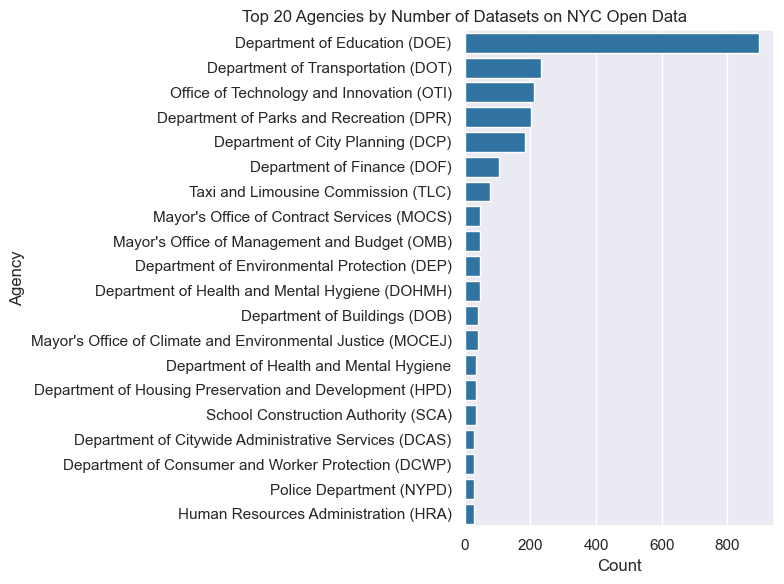

In [7]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.barplot(
    data=data,
    y='attribution',
    x='count',
    color='#1f77b4',
    ax=ax
)

plt.title('Top 20 Agencies by Number of Datasets on NYC Open Data', x=0)
plt.xlabel('Count')
plt.ylabel('Agency')

plt.tight_layout()
plt.savefig('figures/datasets-count.png', dpi=250, bbox_inches='tight')

In [8]:
# sorting the datasets by download_count, top 10
data = (
    df
    .loc[:, ['attribution', 'name', 'download_count']]
    .sort_values(by='download_count', ascending=False)
    .head(10)
    
    # calculate full dataset and agency name column
    # format count to millions
    .assign(
        full_name = df['name']  + ':\n' + df['attribution'],
        download_countM = df['download_count'] / 1e6
    )
    
)

# preview data
data.head()

,attribution,name,download_count,full_name,download_countM
46,Department of Health and Mental Hygiene (DOHMH),Air Quality,2488005,Air Quality:\nDepartment of Health and Mental ...,2.488005
0,Taxi and Limousine Commission (TLC),For Hire Vehicles (FHV) - Active,531615,For Hire Vehicles (FHV) - Active:\nTaxi and Li...,0.531615
5,311,311 Service Requests from 2010 to Present,444317,311 Service Requests from 2010 to Present:\n311,0.444317
1147,Department of Transportation (DOT),Overhead Electronic Signs,429904,Overhead Electronic Signs:\nDepartment of Tran...,0.429904
178,Department of Homeless Services (DHS),Directory Of Homebase Locations,422099,Directory Of Homebase Locations:\nDepartment o...,0.422099


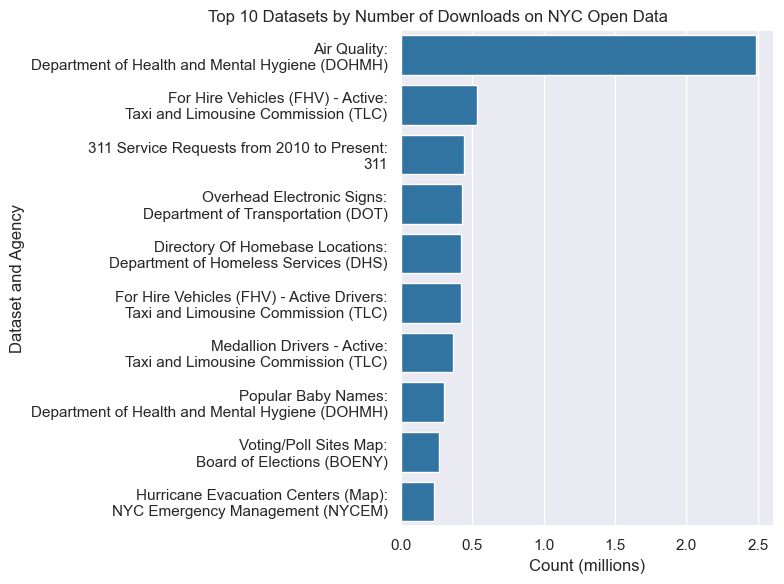

In [9]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.barplot(
    data=data,
    y='full_name',
    x='download_countM',
    color='#1f77b4',
    ax=ax
)

plt.title('Top 10 Datasets by Number of Downloads on NYC Open Data', x=.1)
plt.xlabel('Count (millions)')
plt.ylabel('Dataset and Agency')

plt.tight_layout()
plt.savefig('figures/datasets-download.png', dpi=250, bbox_inches='tight')

In [10]:
# group download count by agency, top 20
data = (
    df
    .groupby(by='attribution')['download_count']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
    .head(20)
)

# format count in M
data['download_countM'] = data['download_count'] / 1e6

# preview data
data

,attribution,download_count,download_countM
0,Department of Health and Mental Hygiene (DOHMH),3107336,3.107336
1,Taxi and Limousine Commission (TLC),1913672,1.913672
2,Department of Education (DOE),1040300,1.040300
3,Department of City Planning (DCP),1020779,1.020779
4,Department of Finance (DOF),706744,0.706744
5,Department of Transportation (DOT),646619,0.646619
6,Police Department (NYPD),592458,0.592458
7,Department of Homeless Services (DHS),563322,0.563322
8,311,523569,0.523569
9,Office of Technology and Innovation (OTI),463705,0.463705


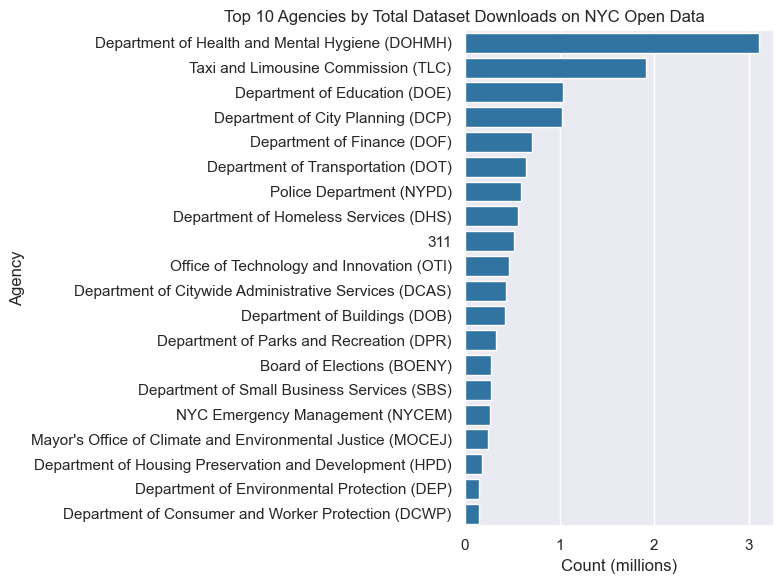

In [11]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.barplot(
    data=data,
    y='attribution',
    x='download_countM',
    color='#1f77b4',
    ax=ax
)

plt.title('Top 10 Agencies by Total Dataset Downloads on NYC Open Data', x=0)
plt.xlabel('Count (millions)')
plt.ylabel('Agency')

plt.tight_layout()
plt.savefig('figures/agency-downloads.png', dpi=250, bbox_inches='tight')

In [12]:
# examine average download count across all datasets by agency
(df
 .groupby(by='attribution')['download_count']
 .mean()
 .sort_values(ascending=False)
 .round(0)
 .astype(int)
 .reset_index()
 .rename(columns={'download_count':'download_count_avg'})
 .head(20)
)

,attribution,download_count_avg
0,Board of Elections (BOENY),91614
1,Department of Health and Mental Hygiene (DOHMH),69052
2,NYC Management Department (NYCEM),41530
3,311,29087
4,Office of Payroll Administration (OPA),28613
5,Department of Homeless Services (DHS),26825
6,Metropolitan Transportation Authority (MTA),26274
7,Mayor’s Office of Media and Entertainment (MOME),25722
8,Taxi and Limousine Commission (TLC),24534
9,Police Department (NYPD),20430


In [13]:
# examine median download count across all datasets by agency
(df
 .groupby(by='attribution')['download_count']
 .median()
 .sort_values(ascending=False)
 .round(0)
 .astype(int)
 .reset_index()
 .rename(columns={'download_count':'download_count_median'})
 .head(20)
)

,attribution,download_count_median
0,NYC Management Department (NYCEM),41530
1,Office of Payroll Administration (OPA),28613
2,Metropolitan Transportation Authority (MTA),26274
3,Mayor’s Office of Media and Entertainment (MOME),25722
4,Broadway Theater,18535
5,Office of Administrative Trials and Hearings (...,17987
6,Department of Mental Health and Hygeine,11453
7,Office of Citywide Event Coordination and Mana...,9309
8,Board of Elections (BOENY),8531
9,Business Integrity Commission,7097


## 3.2 Analyzing NYC Datasets with the Most Page Views

In [14]:
# initialize client
client = Socrata(
    socrata_domain,
    app_token=None,
    timeout=1000
)

# call datasets method
datasets = client.datasets()

# reading in a list of dictionaries of our data into a pandas DataFrame
df = pd.DataFrame(datasets)

# retrieve data in resource column of dictionaries
df = pd.DataFrame.from_records(df.resource)

# sanity check
print(df.shape)
df.head()

(3237, 27)


,name,id,resource_name,parent_fxf,description,attribution,attribution_link,contact_email,type,updatedAt,...,columns_description,columns_format,download_count,provenance,lens_view_type,lens_display_type,locked,blob_mime_type,hide_from_data_json,publication_date
0,For Hire Vehicles (FHV) - Active,8wbx-tsch,None,[],"<b>PLEASE NOTE:</b> This dataset, which includ...",Taxi and Limousine Commission (TLC),None,None,dataset,2024-12-02T19:55:58.000Z,...,"[Permit active or not\n, Base Type, Reason Cod...","[{'displayStyle': 'plain', 'align': 'left'}, {...",531615,official,tabular,table,False,None,False,2021-04-05T13:20:47.000Z
1,Civil Service List (Active),vx8i-nprf,None,[],A Civil Service List consists of all candidate...,Department of Citywide Administrative Services...,None,None,dataset,2024-12-02T14:16:52.000Z,...,[The date on which a list will be extended bey...,"[{'view': 'date', 'align': 'left'}, {'view': '...",68077,official,tabular,table,False,None,False,2024-01-12T16:15:05.000Z
2,DOB Job Application Filings,ic3t-wcy2,None,[],This dataset contains all job applications sub...,Department of Buildings (DOB),None,None,dataset,2024-12-02T21:02:15.000Z,...,"[Sprinkler Work Type? (X=Yes, Blank=No), Zoni...","[{'align': 'right'}, {'align': 'right'}, {'ali...",59315,official,tabular,table,False,None,False,2020-06-22T18:23:35.000Z
3,TLC New Driver Application Status,dpec-ucu7,None,[],THIS DATASET IS UPDATED SEVERAL TIMES PER DAY....,Taxi and Limousine Commission (TLC),None,None,dataset,2024-12-02T23:07:20.000Z,...,[This is the classification of license you hav...,"[{'displayStyle': 'plain', 'align': 'left'}, {...",39623,official,tabular,table,False,None,False,2019-12-17T18:44:57.000Z
4,For Hire Vehicles (FHV) - Active Drivers,xjfq-wh2d,None,[],"<b>PLEASE NOTE:</b> This dataset, which includ...",Taxi and Limousine Commission (TLC),None,None,dataset,2024-12-02T19:57:58.000Z,...,"[WAV if Wheelchair Accessible Trained\n, FHV L...","[{'displayStyle': 'plain', 'align': 'left'}, {...",418592,official,tabular,table,False,None,False,2024-01-11T19:58:17.000Z


In [15]:
# preview columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3237 entries, 0 to 3236
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   name                 3237 non-null   object
 1   id                   3237 non-null   object
 2   resource_name        0 non-null      object
 3   parent_fxf           3237 non-null   object
 4   description          3237 non-null   object
 5   attribution          3170 non-null   object
 6   attribution_link     449 non-null    object
 7   contact_email        0 non-null      object
 8   type                 3237 non-null   object
 9   updatedAt            3237 non-null   object
 10  createdAt            3237 non-null   object
 11  metadata_updated_at  3237 non-null   object
 12  data_updated_at      3060 non-null   object
 13  page_views           3237 non-null   object
 14  columns_name         3237 non-null   object
 15  columns_field_name   3237 non-null   object
 16  column

In [16]:
# preview page_views column
df['page_views'].head()

0    {'page_views_last_week': 7332, 'page_views_las...
1    {'page_views_last_week': 21807, 'page_views_la...
2    {'page_views_last_week': 458, 'page_views_last...
3    {'page_views_last_week': 166, 'page_views_last...
4    {'page_views_last_week': 2567, 'page_views_las...
Name: page_views, dtype: object

In [17]:
# explode columns from dictionary to separate columns in df
df = pd.concat(
    [df.drop(['page_views'], axis=1), df['page_views'].apply(pd.Series)],
    axis=1
)

# sanity check
df.head()

,name,id,resource_name,parent_fxf,description,attribution,attribution_link,contact_email,type,updatedAt,...,locked,blob_mime_type,hide_from_data_json,publication_date,page_views_last_week,page_views_last_month,page_views_total,page_views_last_week_log,page_views_last_month_log,page_views_total_log
0,For Hire Vehicles (FHV) - Active,8wbx-tsch,None,[],"<b>PLEASE NOTE:</b> This dataset, which includ...",Taxi and Limousine Commission (TLC),None,None,dataset,2024-12-02T19:55:58.000Z,...,False,None,False,2021-04-05T13:20:47.000Z,7332.0,31306.0,2921246.0,12.840188,14.934198,21.478153
1,Civil Service List (Active),vx8i-nprf,None,[],A Civil Service List consists of all candidate...,Department of Citywide Administrative Services...,None,None,dataset,2024-12-02T14:16:52.000Z,...,False,None,False,2024-01-12T16:15:05.000Z,21807.0,40629.0,2821711.0,14.412570,15.310258,21.428139
2,DOB Job Application Filings,ic3t-wcy2,None,[],This dataset contains all job applications sub...,Department of Buildings (DOB),None,None,dataset,2024-12-02T21:02:15.000Z,...,False,None,False,2020-06-22T18:23:35.000Z,458.0,1943.0,2365674.0,8.842350,10.924813,21.173820
3,TLC New Driver Application Status,dpec-ucu7,None,[],THIS DATASET IS UPDATED SEVERAL TIMES PER DAY....,Taxi and Limousine Commission (TLC),None,None,dataset,2024-12-02T23:07:20.000Z,...,False,None,False,2019-12-17T18:44:57.000Z,166.0,701.0,1731769.0,7.383704,9.455327,20.723816
4,For Hire Vehicles (FHV) - Active Drivers,xjfq-wh2d,None,[],"<b>PLEASE NOTE:</b> This dataset, which includ...",Taxi and Limousine Commission (TLC),None,None,dataset,2024-12-02T19:57:58.000Z,...,False,None,False,2024-01-11T19:58:17.000Z,2567.0,11876.0,1495688.0,11.326429,13.535883,20.512379


In [18]:
# page views sorted
data = (
    df
    .loc[:, ['attribution', 'name', 'page_views_total']]
    .sort_values(by='page_views_total', ascending=False)
    .head(10)
)

# new columns
data['full_name'] =  data['name'] + ':\n' + data['attribution']
data['page_views_totalM'] = data['page_views_total'] / 1e6

# preview data
data

,attribution,name,page_views_total,full_name,page_views_totalM
0,Taxi and Limousine Commission (TLC),For Hire Vehicles (FHV) - Active,2921246.0,For Hire Vehicles (FHV) - Active:\nTaxi and Li...,2.921246
1,Department of Citywide Administrative Services...,Civil Service List (Active),2821711.0,Civil Service List (Active):\nDepartment of Ci...,2.821711
2,Department of Buildings (DOB),DOB Job Application Filings,2365674.0,DOB Job Application Filings:\nDepartment of Bu...,2.365674
3,Taxi and Limousine Commission (TLC),TLC New Driver Application Status,1731769.0,TLC New Driver Application Status:\nTaxi and L...,1.731769
4,Taxi and Limousine Commission (TLC),For Hire Vehicles (FHV) - Active Drivers,1495688.0,For Hire Vehicles (FHV) - Active Drivers:\nTax...,1.495688
5,311,311 Service Requests from 2010 to Present,908608.0,311 Service Requests from 2010 to Present:\n311,0.908608
6,Department of Citywide Administrative Services...,Civil Service List Certification,822380.0,Civil Service List Certification:\nDepartment ...,0.822380
7,Office of Payroll Administration (OPA),Citywide Payroll Data (Fiscal Year),724702.0,Citywide Payroll Data (Fiscal Year):\nOffice o...,0.724702
8,Police Department (NYPD),Motor Vehicle Collisions - Crashes,600681.0,Motor Vehicle Collisions - Crashes:\nPolice De...,0.600681
9,Department of Buildings (DOB),DOB Permit Issuance,498542.0,DOB Permit Issuance:\nDepartment of Buildings ...,0.498542


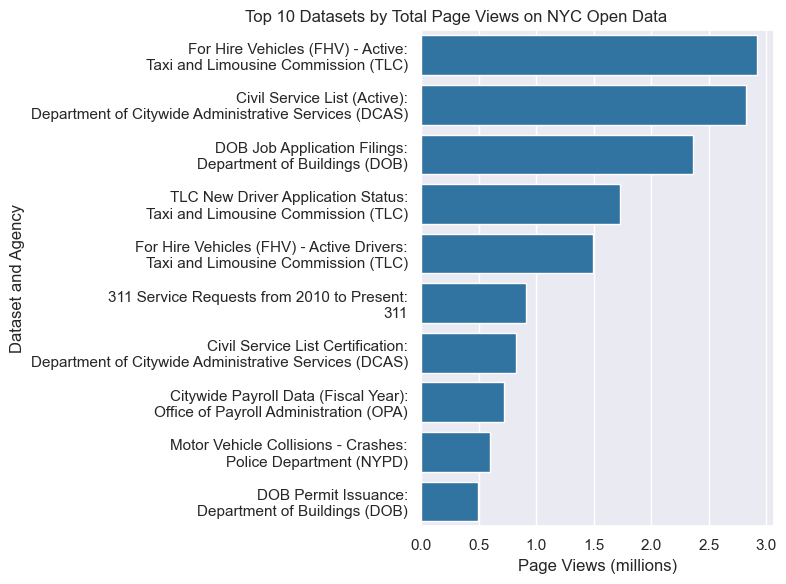

In [19]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.barplot(
    data=data,
    y='full_name',
    x='page_views_totalM',
    color='#1f77b4',
    ax=ax
)

plt.title(
    'Top 10 Datasets by Total Page Views on NYC Open Data', x=.1)
plt.xlabel('Page Views (millions)')
plt.ylabel('Dataset and Agency')

plt.tight_layout()
plt.savefig('figures/pageviews-dataset.png', dpi=250, bbox_inches='tight')

# 4. Questions about NYC 311 Complaints with SoQL
Note: `WARNING:root:Requests made without an app_token will be subject to strict throttling limits.`

Read more from the SODA documentation here: https://dev.socrata.com/docs/app-tokens.html.

## 4.1 Most NYC 311 Complaints by Complaint Type

In [20]:
# source domain for NYC Open Data on Socrata
socrata_domain = 'data.cityofnewyork.us'

# dataset id for NYC 311 on NYC Open Data on Socrata
socrata_dataset_identifier = 'erm2-nwe9'

# Socrata - The main class that interacts with the SODA API. We pass the source domain value
# of NYC Open data, the app token as 'None', and set the timeout parameter for '1,000 seconds'

client = Socrata(
    socrata_domain,
    app_token=None,
    timeout=1000
)

# SoQL query string below:
# select the complaint_type and the count columns 
# grouped by complaint_type, sorted by the count of complaint_type in descending order
# and limit our records to 10

query = """
    SELECT 
        complaint_type, 
        count(unique_key) AS count
    GROUP BY 
        complaint_type
    ORDER BY 
        count DESC
    LIMIT 
        10
"""

# requesting data from the NYC 311 dataset and passing our query as a full SoQL query string
results = client.get(socrata_dataset_identifier, query=query)

df = pd.DataFrame(results)

# sanity check
print(f'shape of data: {df.shape}')
df.head(10)

shape of data: (10, 2)


,complaint_type,count
0,Noise - Residential,3587017
1,Illegal Parking,2777548
2,HEAT/HOT WATER,2296715
3,Blocked Driveway,1667678
4,Noise - Street/Sidewalk,1323104
5,Street Condition,1301758
6,Street Light Condition,1156220
7,Request Large Bulky Item Collection,1073753
8,PLUMBING,976884
9,Water System,930907


In [21]:
# preview columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   complaint_type  10 non-null     object
 1   count           10 non-null     object
dtypes: object(2)
memory usage: 288.0+ bytes


In [22]:
# cast count as int and convert to M
df['count'] = df['count'].astype(int)
df['countM'] = df['count'] / 1e6

# sanity check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   complaint_type  10 non-null     object 
 1   count           10 non-null     int64  
 2   countM          10 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 368.0+ bytes


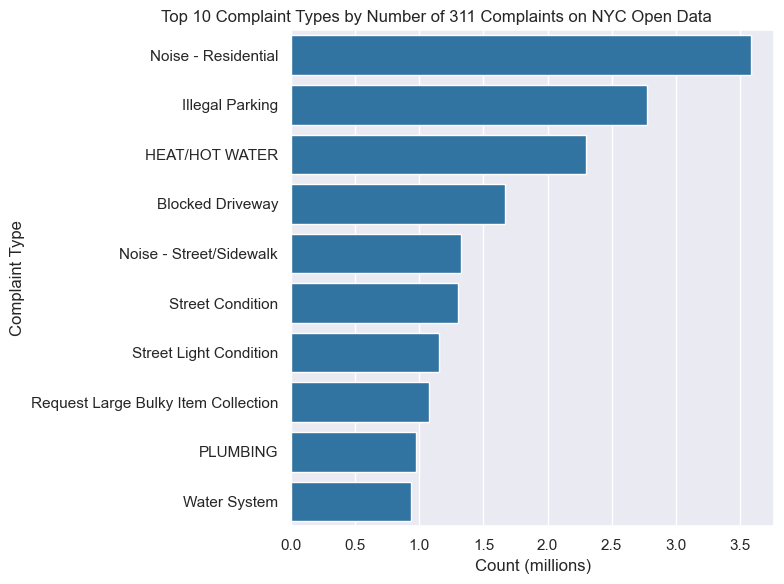

In [23]:
fig, ax = plt.subplots(figsize=(8, 6))

data = df.sort_values(by='count', ascending=False)

sns.barplot(
    data=data,
    y='complaint_type',
    x='countM',
    color='#1f77b4',
    ax=ax
)

plt.title('Top 10 Complaint Types by Number of 311 Complaints on NYC Open Data', x=.3)
plt.xlabel('Count (millions)')
plt.ylabel('Complaint Type')

plt.tight_layout()
plt.savefig('figures/complaint-type.png', dpi=250, bbox_inches='tight')

In [24]:
client.close()

In [25]:
socrata_domain = 'data.cityofnewyork.us'
socrata_dataset_identifier = 'erm2-nwe9'

client = Socrata(
    socrata_domain,
    app_token=None,
    timeout=5000
)

# SoQL query string below:
# select the complaint_type and the count of complaint_type columns 
# grouped by complaint_type, sorted by the count of complaint_type in descending order
# and limit our records to 10

query = """
    SELECT 
        complaint_type, 
        descriptor,
        count(unique_key) AS count
    GROUP BY 
        complaint_type, descriptor
    ORDER BY 
        count DESC
    LIMIT 
        10
"""

results = client.get(socrata_dataset_identifier, query=query)

df = pd.DataFrame(results)

# sanity check
print(f'shape of data: {df.shape}')
df.head(10)

shape of data: (10, 3)


,complaint_type,descriptor,count
0,Noise - Residential,Loud Music/Party,2365372
1,HEAT/HOT WATER,ENTIRE BUILDING,1502631
2,Blocked Driveway,No Access,1237464
3,Request Large Bulky Item Collection,Request Large Bulky Item Collection,1073753
4,Noise - Street/Sidewalk,Loud Music/Party,1035281
5,Noise - Residential,Banging/Pounding,938283
6,HEATING,HEAT,868960
7,Street Light Condition,Street Light Out,850694
8,HEAT/HOT WATER,APARTMENT ONLY,794084
9,Street Condition,Pothole,781620


In [26]:
# cast count to int and convert to M
df['count'] = df['count'].astype(int)
df['countM'] = df['count'] / 1e6

# add full name
df['type_full'] =  df['descriptor'] + ':\n' + df['complaint_type']

# sanity check
df.head()

,complaint_type,descriptor,count,countM,type_full
0,Noise - Residential,Loud Music/Party,2365372,2.365372,Loud Music/Party:\nNoise - Residential
1,HEAT/HOT WATER,ENTIRE BUILDING,1502631,1.502631,ENTIRE BUILDING:\nHEAT/HOT WATER
2,Blocked Driveway,No Access,1237464,1.237464,No Access:\nBlocked Driveway
3,Request Large Bulky Item Collection,Request Large Bulky Item Collection,1073753,1.073753,Request Large Bulky Item Collection:\nRequest ...
4,Noise - Street/Sidewalk,Loud Music/Party,1035281,1.035281,Loud Music/Party:\nNoise - Street/Sidewalk


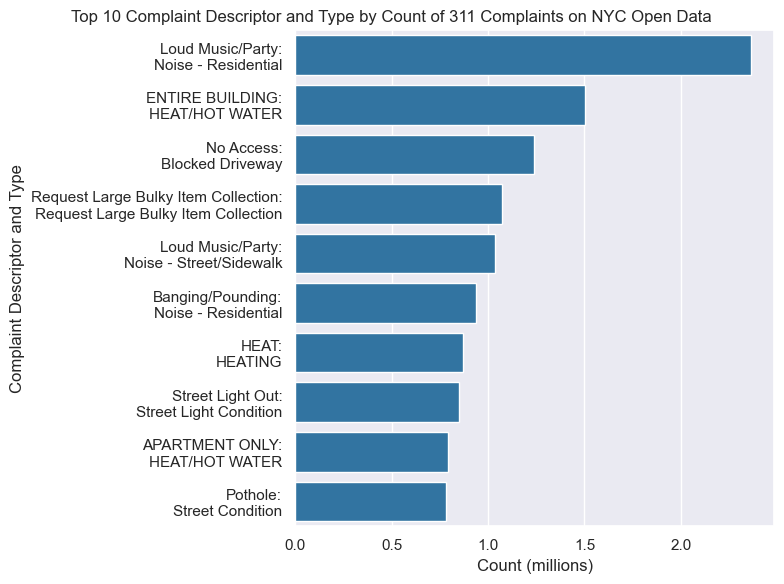

In [27]:
fig, ax = plt.subplots(figsize=(8, 6))

data = df.sort_values(by='count', ascending=False)

sns.barplot(
    data=data,
    y='type_full',
    x='countM',
    color='#1f77b4',
    ax=ax
)

plt.title('Top 10 Complaint Descriptor and Type by Count of 311 Complaints on NYC Open Data', x=.2)
plt.xlabel('Count (millions)')
plt.ylabel('Complaint Descriptor and Type')

plt.tight_layout()
plt.savefig('figures/descriptor-type.png', dpi=250, bbox_inches='tight')

In [28]:
client.close()

## 4.2 Most NYC 311 Complaints by Day

In [29]:
socrata_domain = 'data.cityofnewyork.us'
socrata_dataset_identifier = 'erm2-nwe9'

client = Socrata(
    socrata_domain,
    app_token=None,
    timeout=5000
)

# SoQL query string below:
# select the day and count day grouped by day,
# sort by count in descending order and limit our records to 10

query = """
    SELECT 
        date_trunc_ymd(created_date) AS day, 
        count(unique_key) AS count
    GROUP BY 
        day
    ORDER BY 
        count DESC
    LIMIT 
        10
"""

results = client.get(socrata_dataset_identifier, query=query)

df = pd.DataFrame(results)

# sanity check
print(f'shape of data: {df.shape}')
df.head(10)

shape of data: (10, 2)


,day,count
0,2020-08-04T00:00:00.000,24415
1,2020-08-05T00:00:00.000,19560
2,2023-09-29T00:00:00.000,17963
3,2020-07-05T00:00:00.000,16916
4,2024-04-15T00:00:00.000,15903
5,2020-06-21T00:00:00.000,15883
6,2020-06-20T00:00:00.000,15825
7,2020-07-04T00:00:00.000,15794
8,2021-09-02T00:00:00.000,15205
9,2024-09-15T00:00:00.000,14593


In [30]:
# format day to datetime, count as INT
df['day_fmt'] = pd.to_datetime(df['day']).astype(str)
df['count'] = df['count'].astype(int)

# sanity check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   day      10 non-null     object
 1   count    10 non-null     int64 
 2   day_fmt  10 non-null     object
dtypes: int64(1), object(2)
memory usage: 368.0+ bytes


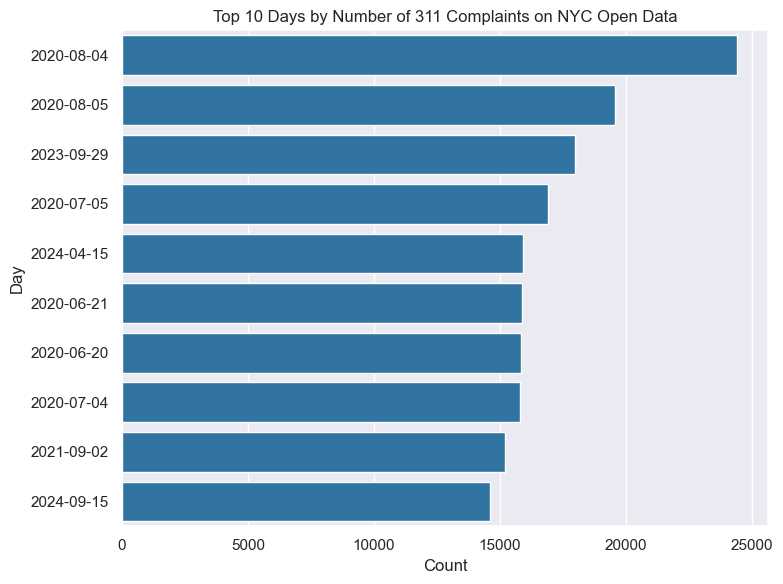

In [31]:
fig, ax = plt.subplots(figsize=(8, 6))

data = df.sort_values(by='count', ascending=False)

sns.barplot(
    data=data,
    y='day_fmt',
    x='count',
    color='#1f77b4',
    ax=ax
)

plt.title('Top 10 Days by Number of 311 Complaints on NYC Open Data')
plt.xlabel('Count')
plt.ylabel('Day')

plt.tight_layout()
plt.savefig('figures/day-top.png', dpi=250, bbox_inches='tight')

In [32]:
client.close()

### NYC 311 Complaints by Day

In [33]:
socrata_domain = 'data.cityofnewyork.us'
socrata_dataset_identifier = 'erm2-nwe9'

client = Socrata(
    socrata_domain,
    app_token=None,
    timeout=5000
)

# SoQL query string below:
# select the day and count day grouped by day,
# sort by count in descending order and limit our records to 1,000

query = """
    SELECT 
        date_trunc_ymd(created_date) AS day, 
        count(unique_key) AS count
    GROUP BY 
        day
    ORDER BY 
        count DESC
    LIMIT 
        10000
"""

results = client.get(socrata_dataset_identifier, query=query)

df = pd.DataFrame(results)

# sanity check
print(f'shape of data: {df.shape}')
df.head(10)

shape of data: (5449, 2)


,day,count
0,2020-08-04T00:00:00.000,24415
1,2020-08-05T00:00:00.000,19560
2,2023-09-29T00:00:00.000,17963
3,2020-07-05T00:00:00.000,16916
4,2024-04-15T00:00:00.000,15903
5,2020-06-21T00:00:00.000,15883
6,2020-06-20T00:00:00.000,15825
7,2020-07-04T00:00:00.000,15794
8,2021-09-02T00:00:00.000,15205
9,2024-09-15T00:00:00.000,14593


In [34]:
# cast day to datetime and count as INT
df['day_fmt'] = pd.to_datetime(df['day'])
df['count']  = df['count'].astype(int)

# removing last two days to prevent incomplete days
df = (
    df
    .sort_values(by='day_fmt')
    .iloc[:-2, :]
)

# sanity check
df.tail()

,day,count,day_fmt
157,2024-11-25T00:00:00.000,10699,2024-11-25
898,2024-11-26T00:00:00.000,8969,2024-11-26
1115,2024-11-27T00:00:00.000,8684,2024-11-27
3293,2024-11-28T00:00:00.000,6489,2024-11-28
956,2024-11-29T00:00:00.000,8890,2024-11-29


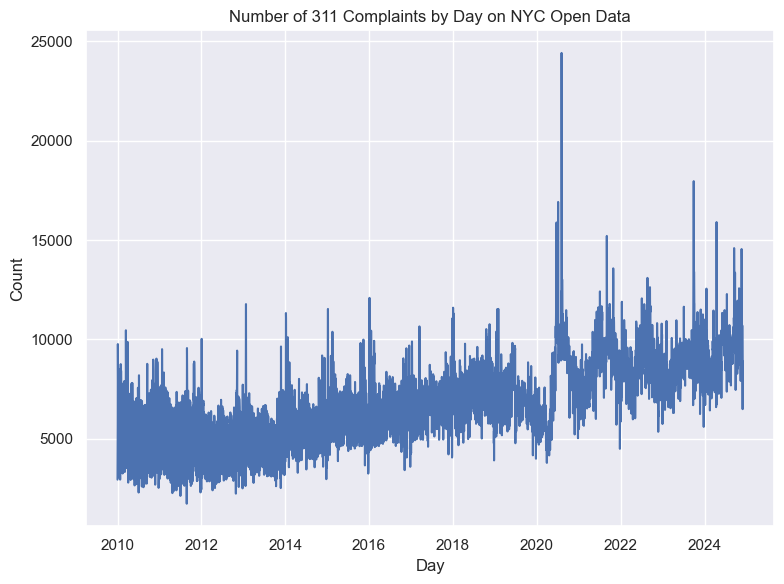

In [35]:
fig, ax = plt.subplots(figsize=(8, 6))

data = (
    df
    .set_index('day_fmt')
    .loc[:, ['count']]
    .astype(int)
)

sns.lineplot(
    data=data,
    x=data.index,
    y='count',
    ax=ax
)

plt.title('Number of 311 Complaints by Day on NYC Open Data')
plt.xlabel('Day')
plt.ylabel('Count')

plt.tight_layout()
plt.savefig('figures/day-line.png', dpi=250, bbox_inches='tight')

### Exploring Complaints on the Highest Day

In [36]:
socrata_domain = 'data.cityofnewyork.us'
socrata_dataset_identifier = 'erm2-nwe9'

client = Socrata(
    socrata_domain,
    app_token=None,
    timeout=5000
)

query = """
    SELECT 
        date_trunc_ymd(created_date) AS day,
        complaint_type, 
        descriptor,
        count(unique_key) AS count
    WHERE
        date_trunc_ymd(created_date) = '2020-08-04T00:00:00.000'
    GROUP BY 
        day, complaint_type, descriptor
    ORDER BY 
        count DESC
    LIMIT 
        100
"""

results = client.get(socrata_dataset_identifier, query=query)

df = pd.DataFrame(results)

# sanity check
df.tail()

,day,complaint_type,descriptor,count
95,2020-08-04T00:00:00.000,Sidewalk Condition,Sidewalk Violation,17
96,2020-08-04T00:00:00.000,PLUMBING,TOILET,17
97,2020-08-04T00:00:00.000,Missed Collection (All Materials),2 Bulk-Missed Collection,17
98,2020-08-04T00:00:00.000,Street Condition,Failed Street Repair,16
99,2020-08-04T00:00:00.000,Illegal Tree Damage,Roots Damaged,16


In [37]:
# casting as int and construct full complaint name
df['count'] = df['count'].astype(int)
df['type_full'] =  df['descriptor']  + ':\n' + df['complaint_type']

# sanity check
df.head()

,day,complaint_type,descriptor,count,type_full
0,2020-08-04T00:00:00.000,Damaged Tree,Entire Tree Has Fallen Down,7848,Entire Tree Has Fallen Down:\nDamaged Tree
1,2020-08-04T00:00:00.000,Damaged Tree,Branch or Limb Has Fallen Down,4971,Branch or Limb Has Fallen Down:\nDamaged Tree
2,2020-08-04T00:00:00.000,Damaged Tree,Branch Cracked and Will Fall,1330,Branch Cracked and Will Fall:\nDamaged Tree
3,2020-08-04T00:00:00.000,Request Large Bulky Item Collection,Request Large Bulky Item Collection,909,Request Large Bulky Item Collection:\nRequest ...
4,2020-08-04T00:00:00.000,Noise - Residential,Loud Music/Party,762,Loud Music/Party:\nNoise - Residential


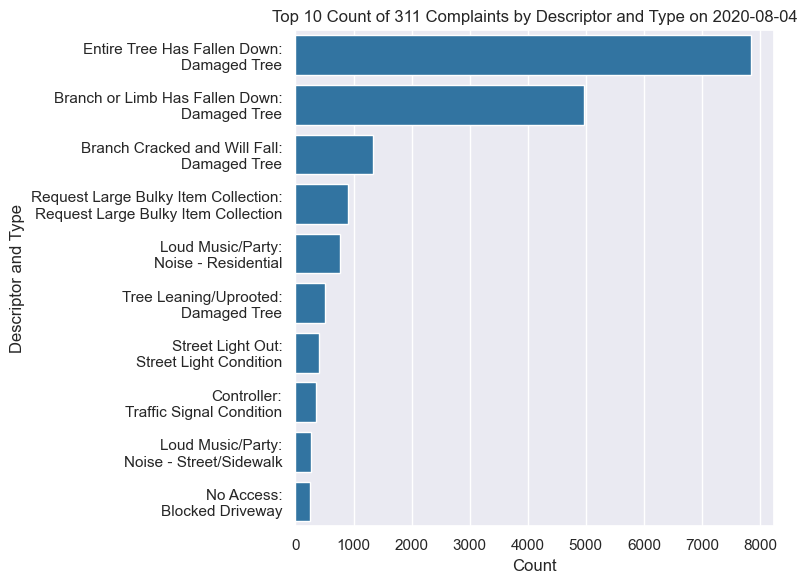

In [38]:
fig, ax = plt.subplots(figsize=(8, 6))

data = (
    df
    .sort_values(by='count', ascending=False)
    .head(10)
)

sns.barplot(
    data=data,
    y='type_full',
    x='count',
    color='#1f77b4',
    ax=ax
)

# retrieve date string
date = data.head(1)['day'].str.split('T').values[0][0]
plt.title(f'Top 10 Count of 311 Complaints by Descriptor and Type on {date}')
plt.xlabel('Count')
plt.ylabel('Descriptor and Type')

plt.tight_layout()
plt.savefig('figures/day-first.png', dpi=250, bbox_inches='tight')

### Most probable event is Tropical Storm Isaias.
Source: https://www.weather.gov/bgm/pastFloodAugust042020

### Exploring Complaints on the Second Highest Day

In [39]:
socrata_domain = 'data.cityofnewyork.us'
socrata_dataset_identifier = 'erm2-nwe9'

client = Socrata(
    socrata_domain,
    app_token=None,
    timeout=5000
)

query = """
    SELECT 
        date_trunc_ymd(created_date) AS day,
        complaint_type, 
        descriptor,
        count(unique_key) AS count
    WHERE
        date_trunc_ymd(created_date) = '2023-09-29T00:00:00.000'
    GROUP BY 
        day, complaint_type, descriptor
    ORDER BY 
        count DESC
    LIMIT 
        100
"""

results = client.get(socrata_dataset_identifier, query=query)

df = pd.DataFrame(results)

# sanity check
print(f'shape of data: {df.shape}')
df.head(10)

shape of data: (100, 4)


,day,complaint_type,descriptor,count
0,2023-09-29T00:00:00.000,Sewer,Sewer Backup (Use Comments) (SA),1050
1,2023-09-29T00:00:00.000,Water Leak,Heavy Flow,1042
2,2023-09-29T00:00:00.000,WATER LEAK,HEAVY FLOW,1038
3,2023-09-29T00:00:00.000,Sewer Maintenance,Backup,1012
4,2023-09-29T00:00:00.000,Sewer,Street Flooding (SJ),623
5,2023-09-29T00:00:00.000,Sewer Maintenance,Flooding on Street,588
6,2023-09-29T00:00:00.000,Water Leak,Slow Leak,465
7,2023-09-29T00:00:00.000,WATER LEAK,SLOW LEAK,463
8,2023-09-29T00:00:00.000,Sewer,Catch Basin Clogged/Flooding (Use Comments) (SC),394
9,2023-09-29T00:00:00.000,Noise - Residential,Loud Music/Party,363


In [40]:
# casting count as INT and construct full complaint name
df['count'] = df['count'].astype(int)
df['type_full'] = df['descriptor'] + ':\n' + df['complaint_type']

df.head()

,day,complaint_type,descriptor,count,type_full
0,2023-09-29T00:00:00.000,Sewer,Sewer Backup (Use Comments) (SA),1050,Sewer Backup (Use Comments) (SA):\nSewer
1,2023-09-29T00:00:00.000,Water Leak,Heavy Flow,1042,Heavy Flow:\nWater Leak
2,2023-09-29T00:00:00.000,WATER LEAK,HEAVY FLOW,1038,HEAVY FLOW:\nWATER LEAK
3,2023-09-29T00:00:00.000,Sewer Maintenance,Backup,1012,Backup:\nSewer Maintenance
4,2023-09-29T00:00:00.000,Sewer,Street Flooding (SJ),623,Street Flooding (SJ):\nSewer


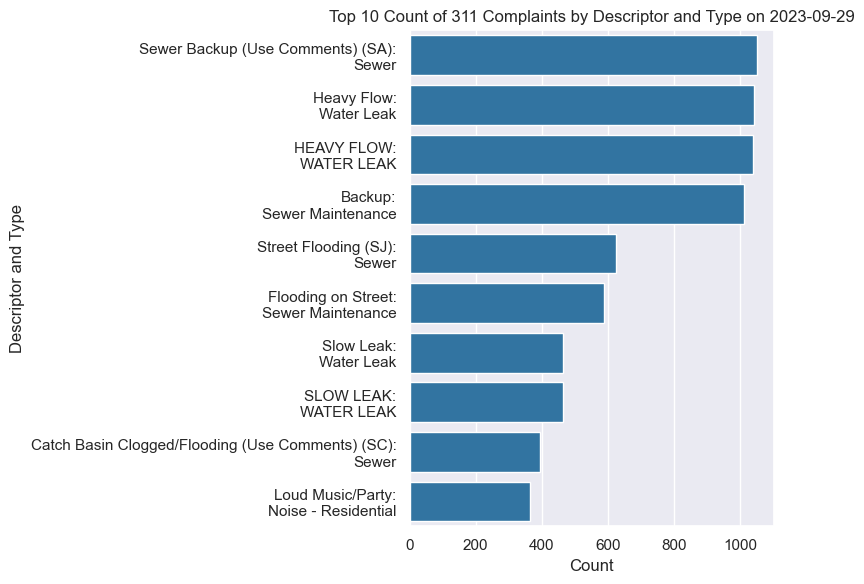

In [41]:
fig, ax = plt.subplots(figsize=(8, 6))

data = (
    df
    .sort_values(by='count', ascending=False)
    .head(10)
)

sns.barplot(
    data=data,
    y='type_full',
    x='count',
    color='#1f77b4',
    ax=ax
)

# retrieve date string
date = data.head(1)['day'].str.split('T').values[0][0]
plt.title(f'Top 10 Count of 311 Complaints by Descriptor and Type on {date}')
plt.xlabel('Count')
plt.ylabel('Descriptor and Type')

plt.tight_layout()
plt.savefig('figures/day-second.png', dpi=250, bbox_inches='tight')

### Most probable event is Tropical Storm Ophelia.
Source: https://en.wikipedia.org/wiki/September_2023_New_York_floods

### Exploring Complaints on the Third Highest Day

In [42]:
socrata_domain = 'data.cityofnewyork.us'
socrata_dataset_identifier = 'erm2-nwe9'

client = Socrata(
    socrata_domain,
    app_token=None,
    timeout=5000
)

query = """
    SELECT 
        date_trunc_ymd(created_date) AS day,
        complaint_type, 
        descriptor,
        count(unique_key) AS count
    WHERE
        date_trunc_ymd(created_date) = '2020-07-05T00:00:00.000'
    GROUP BY 
        day, complaint_type, descriptor
    ORDER BY 
        count DESC
    LIMIT 
        100
"""

results = client.get(socrata_dataset_identifier, query=query)

df = pd.DataFrame(results)

# sanity check
print(f'shape of data: {df.shape}')
df.head(10)

shape of data: (100, 4)


,day,complaint_type,descriptor,count
0,2020-07-05T00:00:00.000,Noise - Residential,Loud Music/Party,4334
1,2020-07-05T00:00:00.000,Illegal Fireworks,N/A,4199
2,2020-07-05T00:00:00.000,Noise - Street/Sidewalk,Loud Music/Party,2837
3,2020-07-05T00:00:00.000,Request Large Bulky Item Collection,Request Large Bulky Item Collection,752
4,2020-07-05T00:00:00.000,Noise - Vehicle,Car/Truck Music,412
5,2020-07-05T00:00:00.000,Noise - Residential,Banging/Pounding,304
6,2020-07-05T00:00:00.000,Non-Emergency Police Matter,Social Distancing,239
7,2020-07-05T00:00:00.000,Blocked Driveway,No Access,206
8,2020-07-05T00:00:00.000,Noise - Commercial,Loud Music/Party,189
9,2020-07-05T00:00:00.000,Water System,Hydrant Running Full (WA4),188


In [43]:
# casting count as INT and build full complaint name
df['count'] = df['count'].astype(int)
df['type_full'] = df['descriptor'] + ':\n' + df['complaint_type']

df.head()

,day,complaint_type,descriptor,count,type_full
0,2020-07-05T00:00:00.000,Noise - Residential,Loud Music/Party,4334,Loud Music/Party:\nNoise - Residential
1,2020-07-05T00:00:00.000,Illegal Fireworks,N/A,4199,N/A:\nIllegal Fireworks
2,2020-07-05T00:00:00.000,Noise - Street/Sidewalk,Loud Music/Party,2837,Loud Music/Party:\nNoise - Street/Sidewalk
3,2020-07-05T00:00:00.000,Request Large Bulky Item Collection,Request Large Bulky Item Collection,752,Request Large Bulky Item Collection:\nRequest ...
4,2020-07-05T00:00:00.000,Noise - Vehicle,Car/Truck Music,412,Car/Truck Music:\nNoise - Vehicle


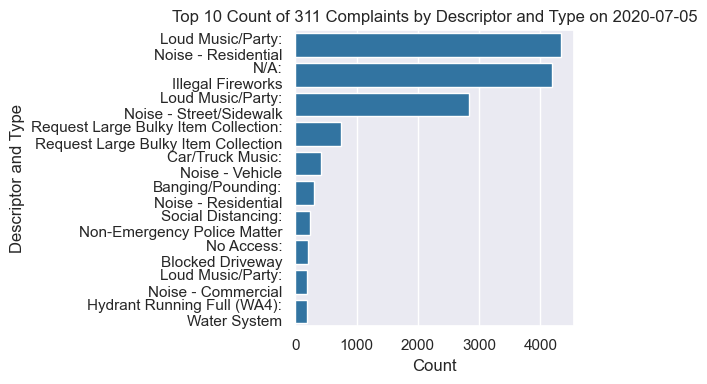

In [44]:
fig, ax = plt.subplots(figsize=(6, 4))

data = (
    df
    .sort_values(by='count', ascending=False)
    .head(10)
)

sns.barplot(
    data=data,
    y='type_full',
    x='count',
    color='#1f77b4',
    ax=ax
)

# retrieve date string
date = data.head(1)['day'].str.split('T').values[0][0]
plt.title(f'Top 10 Count of 311 Complaints by Descriptor and Type on {date}')
plt.xlabel('Count')
plt.ylabel('Descriptor and Type')

plt.tight_layout()
plt.savefig('figures/day-third.png', dpi=250, bbox_inches='tight')

### Most probable event is July 4th celebrations.
Source: https://abc7ny.com/nyc-shootings-2020-last-night-this-week-in/6299513/

In [45]:
client.close()

## 5. Analyzing NYC 311 Street Flooding Complaints
Note: `WARNING:root:Requests made without an app_token will be subject to strict throttling limits.`

### 5.1 Searching the dataset for the word "flood" in the complaint_type field

In [46]:
socrata_domain = 'data.cityofnewyork.us'
socrata_dataset_identifier = 'erm2-nwe9'

client = Socrata(
    socrata_domain,
    app_token=None,
    timeout=1000
)

# SoQL query string below: select complaint_type and count of complaint_type grouped by compaint_type,
# where the word "flood" is in compplaint_type, sort count in descending order and
# limit our records to 1,000

query = """
    SELECT 
        complaint_type, 
        count(unique_key) AS count
    WHERE 
        LOWER(complaint_type) LIKE '%flood%'
    GROUP BY 
        complaint_type
    ORDER BY 
        count(unique_key) DESC
    LIMIT 
        1000
"""

results = client.get(socrata_dataset_identifier, query=query)

df = pd.DataFrame(results)

# sanity check
print(f'shape of data: {df.shape}')
df.head(10)

shape of data: (0, 0)


""


### 5.2 Searching the dataset for the word "flood" in the descriptor field

In [47]:
socrata_domain = 'data.cityofnewyork.us'
socrata_dataset_identifier = 'erm2-nwe9'

client = Socrata(
    socrata_domain,
    app_token=None,
    timeout=1000
)

# SoQL query string below:
# select complaint_type and count of complaint_type grouped by compaint_type,
# where the word "flood" is in descriptor, sort count in descending order and
# limit our records to 1,000

query = """
    SELECT 
        complaint_type,
        descriptor,
        count(unique_key) AS count
    WHERE 
        LOWER(descriptor) LIKE '%flood%'
    GROUP BY 
        complaint_type, descriptor
    ORDER BY 
        count(unique_key) DESC
    LIMIT 
        1000
"""

results = client.get(socrata_dataset_identifier, query=query)

df = pd.DataFrame(results)

# sanity check
print(f'shape of data: {df.shape}')
df

shape of data: (13, 3)


,complaint_type,descriptor,count
0,Sewer,Catch Basin Clogged/Flooding (Use Comments) (SC),118501
1,Sewer,Street Flooding (SJ),40949
2,Street Light Condition,Flood Light Lamp Out,6606
3,Sewer,Highway Flooding (SH),3186
4,Street Light Condition,Flood Light Lamp Cycling,2614
5,Sewer Maintenance,Flooding on Street,673
6,OEM Literature Request,Ready NY - Flooding,271
7,Street Light Condition,Flood Light Lamp Dayburning,237
8,Street Light Condition,Flood Light Lamp Missing,216
9,Street Light Condition,Flood Light Lamp Dim,195


### 5.3 Displaying the highest number of street flooding complaints by day

In [48]:
socrata_domain = 'data.cityofnewyork.us'
socrata_dataset_identifier = 'erm2-nwe9'

client = Socrata(
    socrata_domain,
    app_token=None,
    timeout=100
)

# SoQL query string below:
# select the day and the count day columns grouped by day,
# where the descriptor is Street Flooding (SJ), sort the count in descending order and
# limit our records to 1,000

query = """
    SELECT 
        date_trunc_ymd(created_date) as day, 
        count(created_date) AS count
    WHERE 
        descriptor = 'Street Flooding (SJ)'
    GROUP BY 
        day
    ORDER BY 
        count DESC
    LIMIT 
        1000
"""

results = client.get(socrata_dataset_identifier, query=query)

df = pd.DataFrame(results)

# sanity check
print(f'shape of data: {df.shape}')
df.head(10)

shape of data: (1000, 2)


,day,count
0,2023-09-29T00:00:00.000,623
1,2021-09-02T00:00:00.000,350
2,2021-09-01T00:00:00.000,344
3,2022-12-23T00:00:00.000,308
4,2017-05-05T00:00:00.000,247
5,2014-12-09T00:00:00.000,226
6,2014-04-30T00:00:00.000,189
7,2021-10-26T00:00:00.000,177
8,2018-04-16T00:00:00.000,163
9,2013-05-08T00:00:00.000,162


In [49]:
day = df.head(1)['day'][0].split('T')[0]
count = df.head(1)['count'][0]

print(f'The highest day of Street Flooding Complaints \
was on {day} with {count} total number of complaints.')

The highest day of Street Flooding Complaints was on 2023-09-29 with 623 total number of complaints.


Let's use the date above to see other complaint types represented on that date.

In [50]:
socrata_domain = 'data.cityofnewyork.us'
socrata_dataset_identifier = 'erm2-nwe9'

client = Socrata(
    socrata_domain,
    app_token=None,
    timeout=1000
)

# SoQL query string below:
# select the day and count day grouped by day,
# sort by count in descending order and limit our records to 1,000

query = """
    SELECT 
        date_trunc_ymd(created_date) AS day,
        complaint_type, 
        descriptor,
        count(unique_key) AS count
    WHERE
        date_trunc_ymd(created_date) == '2023-09-29T00:00:00.000'
    GROUP BY 
        day, complaint_type, descriptor
    ORDER BY 
        count DESC
    LIMIT 
        1000
"""

results = client.get(socrata_dataset_identifier, query=query)

df = pd.DataFrame(results)

# sanity check
print(f'shape of data: {df.shape}')
df.head(10)

shape of data: (495, 4)


,day,complaint_type,descriptor,count
0,2023-09-29T00:00:00.000,Sewer,Sewer Backup (Use Comments) (SA),1050
1,2023-09-29T00:00:00.000,Water Leak,Heavy Flow,1042
2,2023-09-29T00:00:00.000,WATER LEAK,HEAVY FLOW,1038
3,2023-09-29T00:00:00.000,Sewer Maintenance,Backup,1012
4,2023-09-29T00:00:00.000,Sewer,Street Flooding (SJ),623
5,2023-09-29T00:00:00.000,Sewer Maintenance,Flooding on Street,588
6,2023-09-29T00:00:00.000,Water Leak,Slow Leak,465
7,2023-09-29T00:00:00.000,WATER LEAK,SLOW LEAK,463
8,2023-09-29T00:00:00.000,Sewer,Catch Basin Clogged/Flooding (Use Comments) (SC),394
9,2023-09-29T00:00:00.000,Noise - Residential,Loud Music/Party,363


Let's use the second highest event above to see other complaint types represented on that date.

date of `'2021-09-02T00:00:00.000'`

In [51]:
socrata_domain = 'data.cityofnewyork.us'
socrata_dataset_identifier = 'erm2-nwe9'

client = Socrata(
    socrata_domain,
    app_token=None,
    timeout=1000
)

# SoQL query string below:
# select the day and count day grouped by day,
# sort by count in descending order and limit our records to 1,000

query = """
    SELECT 
        date_trunc_ymd(created_date) AS day,
        complaint_type, 
        descriptor,
        count(unique_key) AS count
    WHERE
        date_trunc_ymd(created_date) == '2021-09-02T00:00:00.000'
    GROUP BY 
        day, complaint_type, descriptor
    ORDER BY 
        count DESC
    LIMIT 
        1000
"""

results = client.get(socrata_dataset_identifier, query=query)

df = pd.DataFrame(results)

# sanity check
print(f'shape of data: {df.shape}')
df.head(10)

shape of data: (480, 4)


,day,complaint_type,descriptor,count
0,2021-09-02T00:00:00.000,Sewer,Sewer Backup (Use Comments) (SA),2372
1,2021-09-02T00:00:00.000,Request Large Bulky Item Collection,Request Large Bulky Item Collection,1350
2,2021-09-02T00:00:00.000,WATER LEAK,HEAVY FLOW,564
3,2021-09-02T00:00:00.000,Traffic Signal Condition,Controller,391
4,2021-09-02T00:00:00.000,Noise - Street/Sidewalk,Loud Music/Party,358
5,2021-09-02T00:00:00.000,Sewer,Street Flooding (SJ),350
6,2021-09-02T00:00:00.000,PAINT/PLASTER,CEILING,321
7,2021-09-02T00:00:00.000,Blocked Driveway,No Access,313
8,2021-09-02T00:00:00.000,Damaged Tree,Branch or Limb Has Fallen Down,303
9,2021-09-02T00:00:00.000,Sewer,Catch Basin Clogged/Flooding (Use Comments) (SC),295


### 5.4 Selecting the rows and columns where the descriptor field = 'Street Flooding'

In [52]:
socrata_domain = 'data.cityofnewyork.us'
socrata_dataset_identifier = 'erm2-nwe9'

client = Socrata(
    socrata_domain,
    app_token=None,
    timeout=100
)

# SoQL query string below:
# select all columns where the descriptor is Street Flooding(SJ),
# sort the created date field in descending order and limit our records to 1,000

query = """
    SELECT 
        *
    WHERE 
        descriptor = 'Street Flooding (SJ)'
    ORDER BY 
        created_date DESC
    LIMIT 
        100000
"""

results = client.get(socrata_dataset_identifier, query=query)

df = pd.DataFrame(results)

# sanity check
print(f'shape of data: {df.shape}')
df.head(10)

shape of data: (40949, 32)


,unique_key,created_date,agency,agency_name,complaint_type,descriptor,incident_zip,intersection_street_1,intersection_street_2,address_type,...,incident_address,street_name,cross_street_1,cross_street_2,bbl,closed_date,resolution_description,resolution_action_updated_date,facility_type,due_date
0,63250920,2024-11-30T23:29:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),11234,AVENUE L,TROY AVENUE,INTERSECTION,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,63254360,2024-11-30T11:44:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),11223,NaN,NaN,ADDRESS,...,1991 WEST 10 STREET,WEST 10 STREET,AVENUE S,AVENUE T,3070790047,NaN,NaN,NaN,NaN,NaN
2,63252042,2024-11-30T08:20:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),10467,NaN,NaN,BLOCKFACE,...,WEBSTER AVENUE,WEBSTER AVENUE,GUNHILL ROAD,EAST 233 STREET,NaN,NaN,NaN,NaN,NaN,NaN
3,63254361,2024-11-30T08:02:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),11201,NaN,NaN,BLOCKFACE,...,LIVINGSTON STREET,LIVINGSTON STREET,SMITH STREET,GALLATIN PLACE,NaN,NaN,NaN,NaN,NaN,NaN
4,63253219,2024-11-30T07:26:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),11434,NaN,NaN,ADDRESS,...,140-59 161 STREET,161 STREET,140 AVE,N CONDUIT AVE,4123170015,NaN,NaN,NaN,NaN,NaN
5,63239336,2024-11-29T21:44:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),11236,NaN,NaN,ADDRESS,...,856 REMSEN AVENUE,REMSEN AVENUE,LIRR BAY RIDGE LINE,AVENUE D,3079200005,NaN,NaN,NaN,NaN,NaN
6,63243957,2024-11-29T13:05:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),11413,NaN,NaN,ADDRESS,...,144-26 231 STREET,231 STREET,144 AVE,145 AVE,4135010046,NaN,NaN,NaN,NaN,NaN
7,63241595,2024-11-29T10:47:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),10305,NaN,NaN,ADDRESS,...,168 GRAHAM BOULEVARD,GRAHAM BOULEVARD,OLYMPIA BLVD,FREEBORN ST,5037660024,NaN,NaN,NaN,NaN,NaN
8,63239335,2024-11-29T09:44:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),10029,EAST 97 STREET,MADISON AVENUE,INTERSECTION,...,NaN,NaN,NaN,NaN,NaN,2024-11-29T14:20:00.000,The Department of Environment Protection inspe...,2024-11-29T14:20:00.000,NaN,NaN
9,63233749,2024-11-28T22:26:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),10473,NaN,NaN,ADDRESS,...,210 BETTS AVENUE,BETTS AVENUE,GILDERSLEEVE AVE,DEAD END,2034610010,2024-11-29T08:30:00.000,The Department of Environmental Protection ins...,2024-11-29T08:30:00.000,NaN,NaN


In [53]:
client.close()